# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

In [8]:
print(mnist.train.images.shape[1])
print(mnist.train.images[2])

784
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        

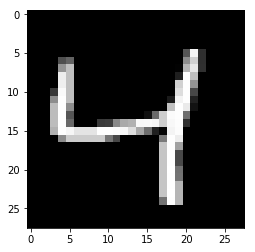

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [22]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape = (None,image_size), name = 'input_layer')
targets_ = tf.placeholder(tf.float32, shape = (None,image_size),name = 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, image_size, activation = tf.nn.relu,use_bias=True)
encoded = tf.layers.dense(encoded, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output_layer')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_ , logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [23]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [24]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6807
Epoch: 1/20... Training loss: 0.6708
Epoch: 1/20... Training loss: 0.6582
Epoch: 1/20... Training loss: 0.6443
Epoch: 1/20... Training loss: 0.6251
Epoch: 1/20... Training loss: 0.6041
Epoch: 1/20... Training loss: 0.5876
Epoch: 1/20... Training loss: 0.5642
Epoch: 1/20... Training loss: 0.5438
Epoch: 1/20... Training loss: 0.5198
Epoch: 1/20... Training loss: 0.4918
Epoch: 1/20... Training loss: 0.4699
Epoch: 1/20... Training loss: 0.4484
Epoch: 1/20... Training loss: 0.4200
Epoch: 1/20... Training loss: 0.4027
Epoch: 1/20... Training loss: 0.3834
Epoch: 1/20... Training loss: 0.3672
Epoch: 1/20... Training loss: 0.3469
Epoch: 1/20... Training loss: 0.3383
Epoch: 1/20... Training loss: 0.3258
Epoch: 1/20... Training loss: 0.3153
Epoch: 1/20... Training loss: 0.3021
Epoch: 1/20... Training loss: 0.3013
Epoch: 1/20... Training loss: 0.2951
Epoch: 1/20... Training loss: 0.2875
E

Epoch: 1/20... Training loss: 0.1445
Epoch: 1/20... Training loss: 0.1385
Epoch: 1/20... Training loss: 0.1434
Epoch: 1/20... Training loss: 0.1430
Epoch: 1/20... Training loss: 0.1401
Epoch: 1/20... Training loss: 0.1374
Epoch: 1/20... Training loss: 0.1394
Epoch: 1/20... Training loss: 0.1444
Epoch: 1/20... Training loss: 0.1442
Epoch: 1/20... Training loss: 0.1388
Epoch: 1/20... Training loss: 0.1421
Epoch: 1/20... Training loss: 0.1389
Epoch: 1/20... Training loss: 0.1385
Epoch: 1/20... Training loss: 0.1402
Epoch: 1/20... Training loss: 0.1380
Epoch: 1/20... Training loss: 0.1357
Epoch: 1/20... Training loss: 0.1360
Epoch: 1/20... Training loss: 0.1399
Epoch: 2/20... Training loss: 0.1384
Epoch: 2/20... Training loss: 0.1339
Epoch: 2/20... Training loss: 0.1385
Epoch: 2/20... Training loss: 0.1361
Epoch: 2/20... Training loss: 0.1355
Epoch: 2/20... Training loss: 0.1375
Epoch: 2/20... Training loss: 0.1418
Epoch: 2/20... Training loss: 0.1347
Epoch: 2/20... Training loss: 0.1383
E

Epoch: 2/20... Training loss: 0.1137
Epoch: 2/20... Training loss: 0.1135
Epoch: 2/20... Training loss: 0.1101
Epoch: 2/20... Training loss: 0.1126
Epoch: 2/20... Training loss: 0.1100
Epoch: 2/20... Training loss: 0.1132
Epoch: 2/20... Training loss: 0.1154
Epoch: 2/20... Training loss: 0.1096
Epoch: 2/20... Training loss: 0.1145
Epoch: 2/20... Training loss: 0.1131
Epoch: 2/20... Training loss: 0.1146
Epoch: 2/20... Training loss: 0.1119
Epoch: 2/20... Training loss: 0.1146
Epoch: 2/20... Training loss: 0.1125
Epoch: 2/20... Training loss: 0.1134
Epoch: 2/20... Training loss: 0.1164
Epoch: 2/20... Training loss: 0.1119
Epoch: 2/20... Training loss: 0.1128
Epoch: 2/20... Training loss: 0.1111
Epoch: 2/20... Training loss: 0.1102
Epoch: 2/20... Training loss: 0.1092
Epoch: 2/20... Training loss: 0.1089
Epoch: 2/20... Training loss: 0.1155
Epoch: 2/20... Training loss: 0.1133
Epoch: 2/20... Training loss: 0.1146
Epoch: 2/20... Training loss: 0.1136
Epoch: 2/20... Training loss: 0.1142
E

Epoch: 3/20... Training loss: 0.1038
Epoch: 3/20... Training loss: 0.1034
Epoch: 3/20... Training loss: 0.1089
Epoch: 3/20... Training loss: 0.1083
Epoch: 3/20... Training loss: 0.1020
Epoch: 3/20... Training loss: 0.1039
Epoch: 3/20... Training loss: 0.1051
Epoch: 3/20... Training loss: 0.1100
Epoch: 3/20... Training loss: 0.1059
Epoch: 3/20... Training loss: 0.1047
Epoch: 3/20... Training loss: 0.1062
Epoch: 3/20... Training loss: 0.1077
Epoch: 3/20... Training loss: 0.1077
Epoch: 3/20... Training loss: 0.1091
Epoch: 3/20... Training loss: 0.1071
Epoch: 3/20... Training loss: 0.1065
Epoch: 3/20... Training loss: 0.1058
Epoch: 3/20... Training loss: 0.1035
Epoch: 3/20... Training loss: 0.1006
Epoch: 3/20... Training loss: 0.1055
Epoch: 3/20... Training loss: 0.1059
Epoch: 3/20... Training loss: 0.1037
Epoch: 3/20... Training loss: 0.1018
Epoch: 3/20... Training loss: 0.1050
Epoch: 3/20... Training loss: 0.1070
Epoch: 3/20... Training loss: 0.1081
Epoch: 3/20... Training loss: 0.1053
E

Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.0991
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.1019
Epoch: 4/20... Training loss: 0.1062
Epoch: 4/20... Training loss: 0.1010
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1029
Epoch: 4/20... Training loss: 0.1056
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.1016
Epoch: 4/20... Training loss: 0.0992
Epoch: 4/20... Training loss: 0.1037
Epoch: 4/20... Training loss: 0.1018
Epoch: 4/20... Training loss: 0.1014
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.0984
Epoch: 4/20... Training loss: 0.0983
Epoch: 4/20... Training loss: 0.1053
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.0975
Epoch: 4/20... Training loss: 0.1053
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1011
E

Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.1004
Epoch: 5/20... Training loss: 0.0941
Epoch: 5/20... Training loss: 0.0981
Epoch: 5/20... Training loss: 0.0981
Epoch: 5/20... Training loss: 0.1009
Epoch: 5/20... Training loss: 0.0997
Epoch: 5/20... Training loss: 0.0977
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.1006
Epoch: 5/20... Training loss: 0.1001
Epoch: 5/20... Training loss: 0.0976
Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.0968
Epoch: 5/20... Training loss: 0.0971
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0938
Epoch: 5/20... Training loss: 0.0977
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0972
Epoch: 5/20... Training loss: 0.0976
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0970
Epoch: 5/20... Training loss: 0.1000
Epoch: 5/20... Training loss: 0.1000
E

Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.0958
Epoch: 6/20... Training loss: 0.0971
Epoch: 6/20... Training loss: 0.0943
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.0959
Epoch: 6/20... Training loss: 0.0963
Epoch: 6/20... Training loss: 0.0971
Epoch: 6/20... Training loss: 0.0963
Epoch: 6/20... Training loss: 0.0944
Epoch: 6/20... Training loss: 0.0946
Epoch: 6/20... Training loss: 0.0977
Epoch: 6/20... Training loss: 0.0993
Epoch: 6/20... Training loss: 0.0981
Epoch: 6/20... Training loss: 0.0986
Epoch: 6/20... Training loss: 0.0939
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.0977
Epoch: 6/20... Training loss: 0.0928
Epoch: 6/20... Training loss: 0.0972
Epoch: 6/20... Training loss: 0.0980
Epoch: 6/20... Training loss: 0.0948
Epoch: 6/20... Training loss: 0.0968
Epoch: 6/20... Training loss: 0.0980
Epoch: 6/20... Training loss: 0.0966
Epoch: 6/20... Training loss: 0.0965
E

Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0925
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.0956
Epoch: 7/20... Training loss: 0.0953
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.0945
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0922
Epoch: 7/20... Training loss: 0.0956
Epoch: 7/20... Training loss: 0.0933
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0953
Epoch: 7/20... Training loss: 0.0943
Epoch: 7/20... Training loss: 0.0954
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.0938
E

Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0927
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0919
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0904
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0985
E

Epoch: 9/20... Training loss: 0.0911
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0910
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0921
E

Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0912
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0892
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0904
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Tra

Epoch: 10/20... Training loss: 0.0888
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0890
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0883
Epoch: 10/20... Training loss: 0.0899
Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0901
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0889
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0892
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0890
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0887
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0898
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0900
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0893
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0874
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0892
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0879
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0867
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0864
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0888
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0887
Epoch: 13/20... Training loss: 0.0878
Epoch: 13/20... Training loss: 0.0881
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0887
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0863
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0890
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0864
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0868
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0862
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0867
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0878
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0883
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0861
Epoch: 14/20... Training loss: 0.0877
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0889
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0885
Epoch: 15/20... Training loss: 0.0876
Epoch: 15/20... Training loss: 0.0859
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0877
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0874
Epoch: 15/20... Training loss: 0.0876
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0857
Epoch: 15/20... Training loss: 0.0857
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0861
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0882
Epoch: 15/20... Training loss: 0.0866
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0876
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0875
Epoch: 16/20... Training loss: 0.0876
Epoch: 16/20... Training loss: 0.0880
Epoch: 16/20... Training loss: 0.0815
Epoch: 16/20... Training loss: 0.0865
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0881
Epoch: 16/20... Training loss: 0.0882
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0819
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0882
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0882
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0849
Epoch: 16/20... Training loss: 0.0858
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0864
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0887
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0876
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0873
Epoch: 17/20... Training loss: 0.0871
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0877
Epoch: 17/20... Training loss: 0.0869
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0859
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0864
Epoch: 17/20... Training loss: 0.0865
Epoch: 17/20... Training loss: 0.0864
Epoch: 17/20... Training loss: 0.0859
Epoch: 17/20... Training loss: 0.0848
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0887
Epoch: 17/20... Training loss: 0.0875
Epoch: 17/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0849
Epoch: 18/20... Training loss: 0.0870
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20... Training loss: 0.0880
Epoch: 18/20... Training loss: 0.0877
Epoch: 18/20... Training loss: 0.0846
Epoch: 18/20... Training loss: 0.0872
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0868
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0849
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0855
Epoch: 18/20... Training loss: 0.0882
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0865
Epoch: 18/20... Training loss: 0.0829
Epoch: 18/20... Training loss: 0.0876
Epoch: 18/20... Training loss: 0.0871
Epoch: 18/20... Training loss: 0.0879
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0867
Epoch: 18/20... Training loss: 0.0827
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0867
Epoch: 18/20... Training loss: 0.0882
Epoch: 18/20... Training loss: 0.0868
Epoch: 18/20... Training loss: 0.0871
Epoch: 19/20... Training loss: 0.0855
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0852
Epoch: 19/20... Training loss: 0.0879
Epoch: 19/20... Training loss: 0.0863
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0877
Epoch: 19/20... Training loss: 0.0853
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0839
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20... Training loss: 0.0855
Epoch: 19/20... Training loss: 0.0880
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0865
Epoch: 19/20... Training loss: 0.0855
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0857
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0865
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0855
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0863
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0868
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0871
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0882
Epoch: 20/20... Training loss: 0.0838
Epoch: 20/20... Training loss: 0.0877
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0867
Epoch: 20/20... Training loss: 0.0854
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0873
Epoch: 20/20... Training loss: 0.0873
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0865
Epoch: 20/20... Training loss: 0.0875
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

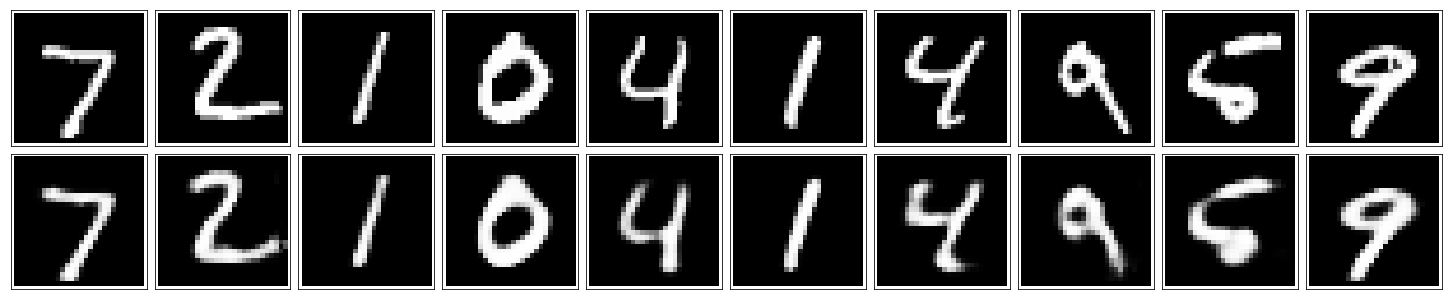

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:11]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [26]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.